In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your data into a DataFrame
data = pd.read_csv('ABT_csv')
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['month'] = df['time_hour'].dt.month

df = df.dropna()

factor1 = df['dewp']
factor2 = df['humid']

# Create a model
model = ols('month ~ C(dewp) + C(humid) + C(dewp):C(humid)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


MemoryError: Unable to allocate 846. GiB for an array with shape (317755, 357210) and data type float64

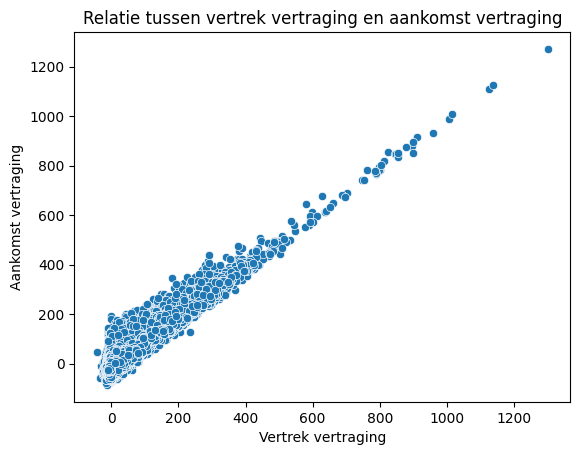

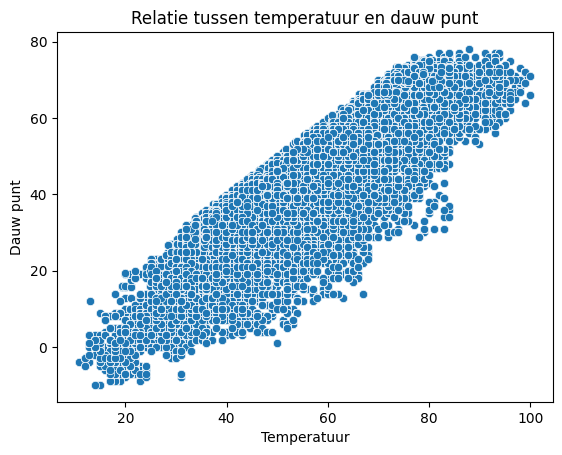

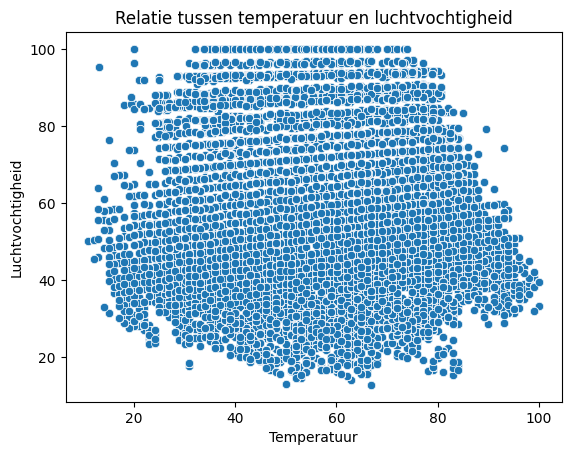

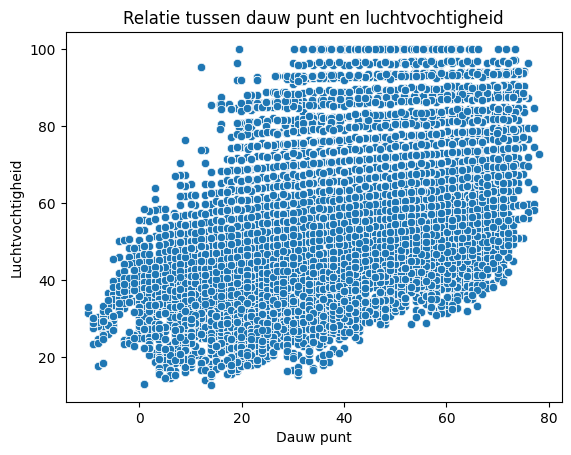

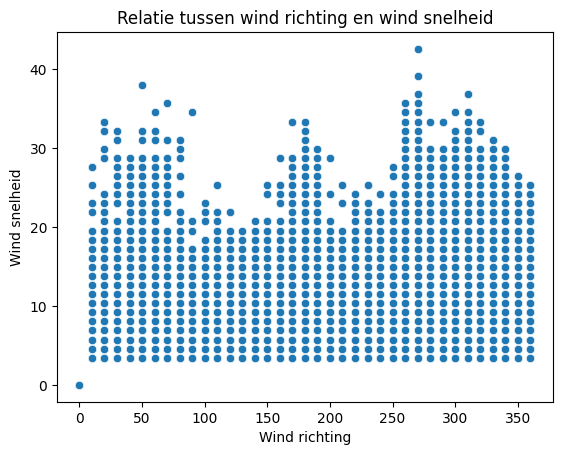

In [2]:
#Scatter plots
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ABT_csv')

df = df.select_dtypes(include=['number'])

#Dep_delay and arr_delay
sns.scatterplot(x='dep_delay', y='arr_delay', data=df)
plt.title('Relatie tussen vertrek vertraging en aankomst vertraging')
plt.xlabel('Vertrek vertraging')
plt.ylabel('Aankomst vertraging')
plt.show()

#Temp and dewp
sns.scatterplot(x='temp', y='dewp', data=df)
plt.title('Relatie tussen temperatuur en dauw punt')
plt.xlabel('Temperatuur')
plt.ylabel('Dauw punt')
plt.show()

#Temp and humid
sns.scatterplot(x='temp', y='humid', data=df)
plt.title('Relatie tussen temperatuur en luchtvochtigheid')
plt.xlabel('Temperatuur')
plt.ylabel('Luchtvochtigheid')
plt.show()

#Dewp and humid
sns.scatterplot(x='dewp', y='humid', data=df)
plt.title('Relatie tussen dauw punt en luchtvochtigheid')
plt.xlabel('Dauw punt')
plt.ylabel('Luchtvochtigheid')
plt.show()

#Wind_dir and wind_speed
sns.scatterplot(x='wind_dir', y='wind_speed', data=df)
plt.title('Relatie tussen wind richting en wind snelheid')
plt.xlabel('Wind richting')
plt.ylabel('Wind snelheid')
plt.show()


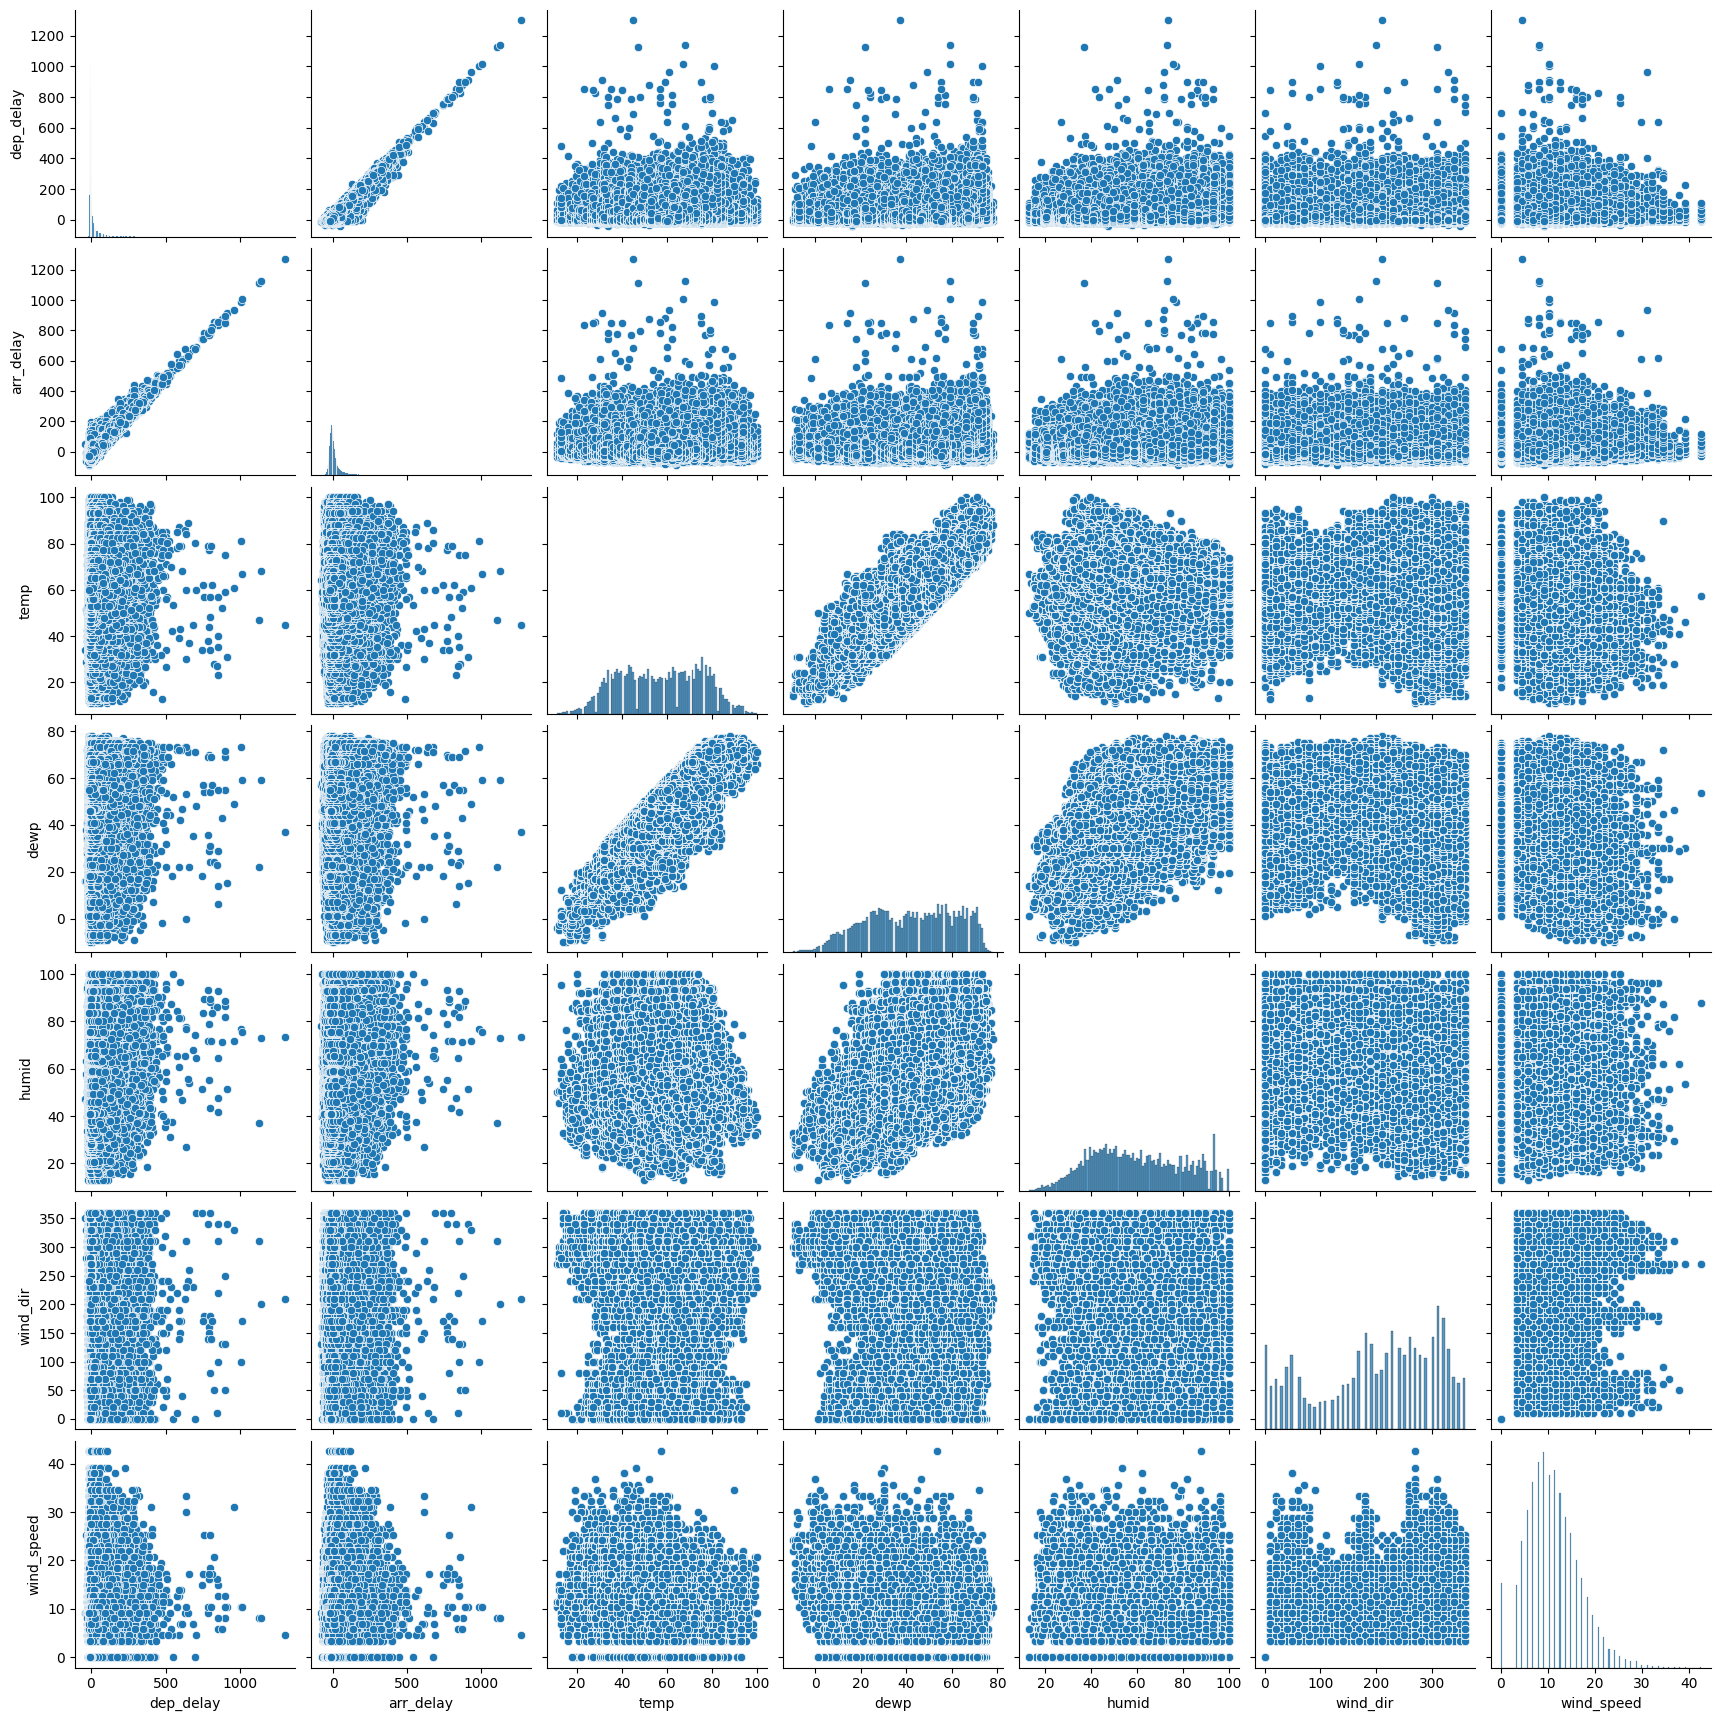

            dep_delay  arr_delay      temp      dewp     humid  wind_dir  \
dep_delay    1.000000   0.914803  0.061491  0.102353  0.117494 -0.017562   
arr_delay    0.914803   1.000000  0.033026  0.086900  0.141397 -0.025391   
temp         0.061491   0.033026  1.000000  0.882265  0.035520 -0.099931   
dewp         0.102353   0.086900  0.882265  1.000000  0.492246 -0.235978   
humid        0.117494   0.141397  0.035520  0.492246  1.000000 -0.324957   
wind_dir    -0.017562  -0.025391 -0.099931 -0.235978 -0.324957  1.000000   
wind_speed   0.047424   0.064069 -0.146848 -0.221230 -0.192249  0.341566   

            wind_speed  
dep_delay     0.047424  
arr_delay     0.064069  
temp         -0.146848  
dewp         -0.221230  
humid        -0.192249  
wind_dir      0.341566  
wind_speed    1.000000  


In [3]:
#Pairplot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ABT_csv')

df = df.select_dtypes(include=['number'])

# Pairplot
sns.pairplot(df)
plt.show()

#Correlation coefficient
correlation_matrix = df.corr()
print(correlation_matrix)

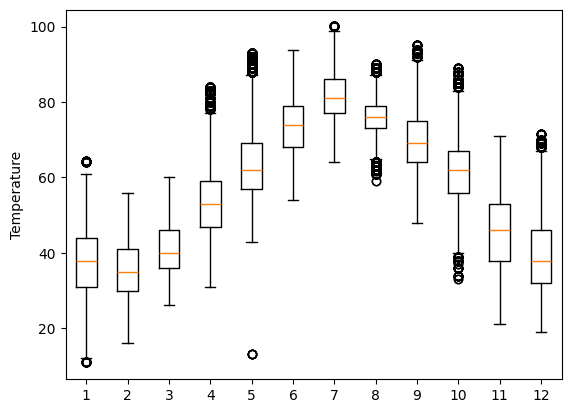

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ABT_csv')

df['time_hour'] = pd.to_datetime(df['time_hour'])
df['month'] = df['time_hour'].dt.month

df = df.dropna(subset=['temp'])

monthly_temps = df.groupby('month')['temp'].apply(list)

temps_per_month = [temps for month,temps in monthly_temps.items()]

fig, ax = plt.subplots(1, 1)
ax.boxplot(temps_per_month[:12])  # Alleen de eerste zes maanden
ax.set_xticklabels(monthly_temps.index[:12])  # Alleen de eerste zes maanden
ax.set_ylabel("Temperature")
plt.show()


In [9]:
#One way Anova test
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv('ABT_csv')

df['time_hour'] = pd.to_datetime(df['time_hour'])
df['month'] = df['time_hour'].dt.month

df = df.dropna(subset=['temp'])

monthly_temps = df.groupby('month')['temp'].apply(list)

temps_per_month = [temps for month,temps in monthly_temps.items()]

f_statistic, p_value = f_oneway(*temps_per_month)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 108415.63246277903
P-value: 0.0


In [ ]:
#Difference of means test
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind

abt_df = pd.read_csv('ABT_csv')

print("Departure")

carrier1 = abt_df[abt_df['carrier'] == 'F9']['dep_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'YV']['dep_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat F9 vs YV: {tstat}")
print(f"P-value F9 vs YV: {pvalue}")

#UA en OO
carrier1 = abt_df[abt_df['carrier'] == 'UA']['dep_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'OO']['dep_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat UA vs OO: {tstat}")
print(f"P-value UA vs OO: {pvalue}")

#EV en F9
carrier1 = abt_df[abt_df['carrier'] == 'EV']['dep_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'F9']['dep_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat EV vs F9: {tstat}")
print(f"P-value EV vs F9: {pvalue}")


print("Arrival")

carrier1 = abt_df[abt_df['carrier'] == 'F9']['arr_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'YV']['arr_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat F9 vs YV: {tstat}")
print(f"P-value F9 vs YV: {pvalue}")

#UA en OO
carrier1 = abt_df[abt_df['carrier'] == 'UA']['arr_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'OO']['arr_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat UA vs OO: {tstat}")
print(f"P-value UA vs OO: {pvalue}")

#EV en F9
carrier1 = abt_df[abt_df['carrier'] == 'EV']['arr_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'F9']['arr_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat EV vs F9: {tstat}")
print(f"P-value EV vs F9: {pvalue}")

In [ ]:
#Proportie tests
from statsmodels.stats.proportion import proportion_confint
import pandas as pd

abt_df = pd.read_csv('ABT_csv')

aantal_vertragingen_vertrek = (abt_df['dep_delay'] > 0).sum()  
aantal_vertragingen_aankomst = (abt_df['arr_delay'] > 0).sum()

aantal_vluchten = len(abt_df)

ci_low, ci_upp = proportion_confint(aantal_vertragingen_vertrek, aantal_vluchten, alpha=0.05, method='normal')
ci_low_1, ci_upp_1 = proportion_confint(aantal_vertragingen_aankomst, aantal_vluchten, alpha=0.05, method='normal')

print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek is: ({ci_low}, {ci_upp})")
print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst is: ({ci_low_1}, {ci_upp_1})")


#DL, HA, EV
carriers_of_interest = ['DL', 'HA', 'EV']
filtered_df = abt_df[abt_df['carrier'].isin(carriers_of_interest)]

aantal_vertragingen_vertrek = filtered_df[filtered_df['dep_delay'] > 0].groupby('carrier').size()
aantal_vertragingen_aankomst = filtered_df[filtered_df['arr_delay'] > 0].groupby('carrier').size()

aantal_vluchten_per_carrier = filtered_df.groupby('carrier').size()

for carrier in carriers_of_interest:
    n_vertragingen_vertrek = aantal_vertragingen_vertrek.get(carrier, 0)
    n_vluchten = aantal_vluchten_per_carrier.get(carrier, 0)
    ci_low, ci_upp = proportion_confint(n_vertragingen_vertrek, n_vluchten, alpha=0.05, method='normal')
    print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek voor carrier {carrier} is: ({ci_low}, {ci_upp})")

for carrier in carriers_of_interest:
    n_vertragingen_aankomst = aantal_vertragingen_aankomst.get(carrier, 0)
    n_vluchten = aantal_vluchten_per_carrier.get(carrier, 0)
    ci_low, ci_upp = proportion_confint(n_vertragingen_aankomst, n_vluchten, alpha=0.05, method='normal')
    print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst voor carrier {carrier} is: ({ci_low}, {ci_upp})")

In [ ]:
#BOxplots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

abt_df = pd.read_csv('ABT_csv')

continuous_features = ['dep_delay', 'arr_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=abt_df[feature], orient='h', color='darkblue', showfliers=True)
    plt.title(f'Boxplot van {feature}')
    plt.xlabel(feature)
    plt.ylabel('Waarden')
    plt.grid(True)
    plt.show()

categorical_feature = 'carrier'

plt.figure(figsize=(10, 8))
sns.boxplot(x=categorical_feature, y='dep_delay', data=abt_df, hue='carrier', palette='Set3', legend=False)
plt.title('Boxplot van dep_delay gegroepeerd op carrier')
plt.xlabel('Carrier')
plt.ylabel('dep_delay')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x=categorical_feature, y='arr_delay', data=abt_df, hue='carrier', palette='Set3', legend=False)
plt.title('Boxplot van arr_delay gegroepeerd op carrier')
plt.xlabel('Carrier')
plt.ylabel('arr_delay')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

abt_df['time_hour'] = pd.to_datetime(df['time_hour'])
abt_df['hour'] = abt_df['time_hour'].dt.hour

plt.figure(figsize=(10, 8))
sns.boxplot(x='hour', y='temp', data=abt_df, hue='hour', palette='Set3', legend=False)
plt.title('Boxplot van temp gegroepeerd op hour')
plt.xlabel('hour')
plt.ylabel('temp')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='hour', y='humid', data=abt_df, hue='hour', palette='Set3', legend=False)
plt.title('Boxplot van humid gegroepeerd op hour')
plt.xlabel('hour')
plt.ylabel('humid')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='hour', y='dewp', data=abt_df, hue='hour', palette='Set3', legend=False)
plt.title('Boxplot van dewp gegroepeerd op hour')
plt.xlabel('hour')
plt.ylabel('dewp')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


In [ ]:
#Histograms and density plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

abt_df = pd.read_csv('ABT_csv')

continuous_features = ['dep_delay', 'arr_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed']

for feature in continuous_features:
    # Calculate Scott's bin width
    n = len(abt_df[feature])
    bin_width = 3.5 * abt_df[feature].std() / np.power(n, 1/3)
    # Calculate the number of bins
    num_bins = int((abt_df[feature].max() - abt_df[feature].min()) / bin_width)

    plt.figure(figsize=(10, 6))
    plt.hist(abt_df[feature], bins=num_bins, color='darkblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=abt_df[feature], fill=True)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()



In [ ]:
#Table data
import pandas as pd
import matplotlib.pyplot as plt

abt_df = pd.read_csv('ABT_csv')

continuous_features = ['dep_delay', 'arr_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed']

continuous_stats = abt_df[continuous_features].describe().transpose()

missing_values_count = abt_df[continuous_features].isnull().sum()

missing_values_percentage = (missing_values_count / len(abt_df)) * 100

cardinality = abt_df[continuous_features].nunique()

continuous_data_quality_report = pd.DataFrame({
    'Feature': continuous_stats.index,
    'Minimum': continuous_stats['min'],
    '1st Quartile': continuous_stats['25%'],
    'Mean': continuous_stats['mean'],
    'Median': continuous_stats['50%'],
    '3rd Quartile': continuous_stats['75%'],
    'Maximum': continuous_stats['max'],
    'Standard Deviation': continuous_stats['std'],
    'Total Instances': len(abt_df),
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Cardinality': cardinality
})

print("Continuous Data Quality Report:")
print(continuous_data_quality_report)


In [ ]:
#Table data categorical features
import pandas as pd
import matplotlib.pyplot as plt

abt_df = pd.read_csv('ABT_csv')

categorical_features = ['dest', 'origin', 'carrier']

for feature in categorical_features:
    mode_value = abt_df[feature].mode()[0]
    
    mode_frequency = abt_df[feature].value_counts().max()
    
    mode_percentage = (mode_frequency / len(abt_df)) * 100
    
    second_mode_value = abt_df[feature].value_counts().index[1] if len(abt_df[feature].value_counts()) > 1 else None
    second_mode_frequency = abt_df[feature].value_counts().iloc[1] if len(abt_df[feature].value_counts()) > 1 else None
    
    second_mode_percentage = (second_mode_frequency / len(abt_df)) * 100 if second_mode_frequency else None
    
    missing_values_percentage = (abt_df[feature].isnull().sum() / len(abt_df)) * 100
    
    cardinality = abt_df[feature].nunique()
    
    total_count = len(abt_df)
    
    print(f"\nCategorical Data Quality Report for {feature}:")
    print(f"Mode: {mode_value}")
    print(f"Mode Frequency: {mode_frequency}")
    print(f"Mode Percentage: {mode_percentage}%")
    print(f"Second Mode: {second_mode_value}")
    print(f"Second Mode Frequency: {second_mode_frequency}")
    print(f"Second Mode Percentage: {second_mode_percentage}%")
    print(f"Missing Values Percentage: {missing_values_percentage}%")
    print(f"Cardinality: {cardinality}")
    print(f"Total Count: {total_count}")


In [ ]:
import pandas as pd

abt_df = pd.read_csv('ABT_csv')

print(abt_df)

In [ ]:
#ABT

import pandas as pd

flights_df = pd.read_csv('CasusEDA/csv/flights_csv')
weather_df = pd.read_csv('CasusEDA/csv/weather_csv')

flights_selected = flights_df[['dest', 'origin', 'carrier', 'dep_delay', 'arr_delay', 'time_hour']]
weather_selected = weather_df[['origin', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'time_hour']]

merged_df = flights_selected.merge(weather_selected, how='left', on=['time_hour', 'origin'])
merged_df['time_hour'] = pd.to_datetime(df['time_hour'])

print(merged_df)
merged_df.to_csv('ABT_csv', index=False)

In [ ]:
import pandas as pd

airlines = pd.read_csv('CasusEDA/csv/airlines_csv')
flights = pd.read_csv('CasusEDA/csv/flights_csv')

df = pd.merge(airlines,flights,on='carrier')
df1 = df.where(flights['carrier'] =='AA')

print(df)


In [ ]:
import pandas as pd

weather = pd.read_csv('CasusEDA/csv/weather_csv')

weather


In [ ]:
import pandas as pd

airports = pd.read_csv('CasusEDA/csv/airports_csv')

airports

In [ ]:
import pandas as pd

flights = pd.read_csv('CasusEDA/csv/flights_csv')

flights

In [ ]:
import pandas as pd

planes = pd.read_csv('CasusEDA/csv/planes_csv')

planes

In [ ]:
import pandas as pd

airlines = pd.read_csv('CasusEDA/csv/airlines_csv')

airlines